In [1]:
# https://towardsdatascience.com/image-filters-in-python-26ee938e57d2
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

# 1. Mean Filter

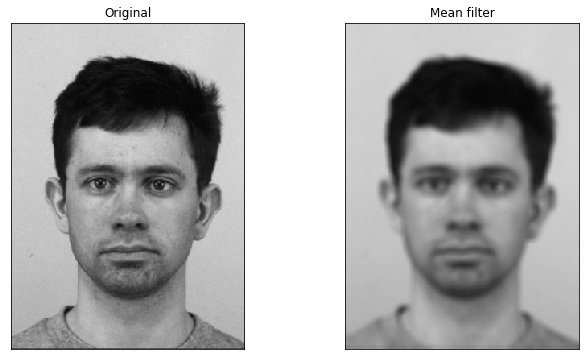

In [77]:
image = cv2.imread('face.JPG') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

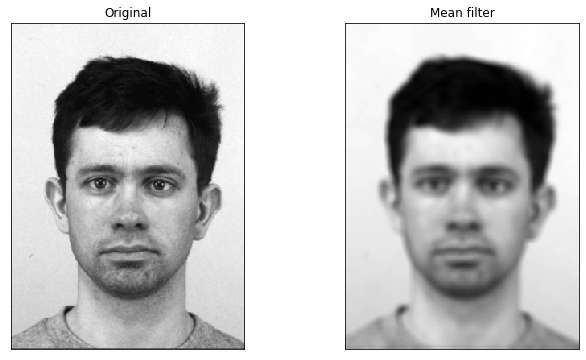

In [78]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

# 2. Gaussian Filter

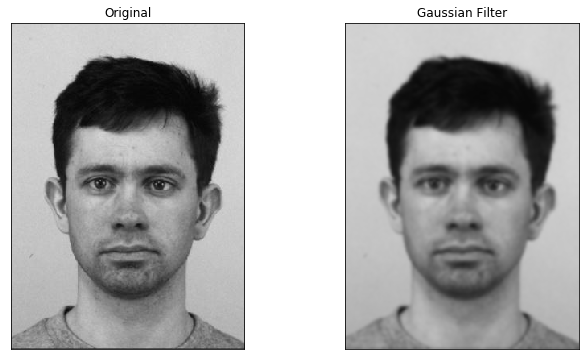

In [79]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

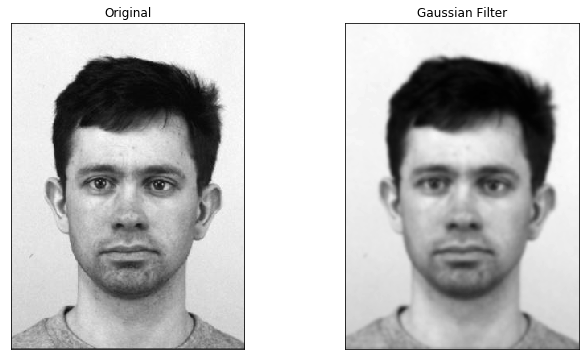

In [80]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# 3. Median Filter

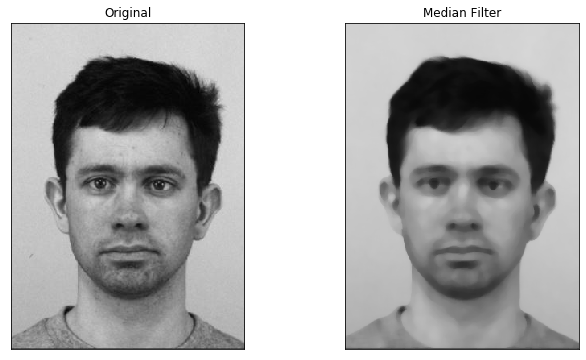

In [81]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

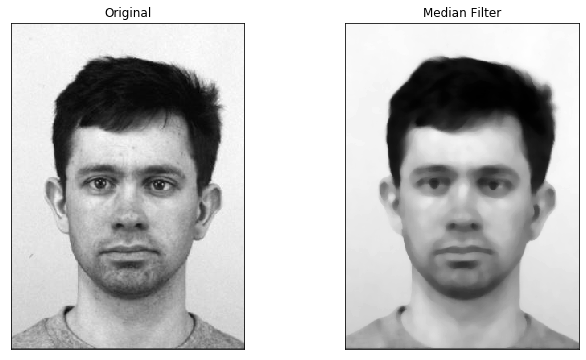

In [82]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Conservative Filter

กำหนดความเข้มต่ำสุดและความเข้มสูงสุดภายในพื้นที่ใกล้เคียงของพิกเซล หากความเข้มของพิกเซลกลางมากกว่าค่าสูงสุดจะถูกแทนที่ด้วยค่าสูงสุด หากน้อยกว่าค่าต่ำสุดกว่าจะถูกแทนที่ด้วยค่าต่ำสุด ฟิลเตอร์อนุรักษ์นิยมรักษาขอบ แต่ไม่ขจัดเสียงรบกวน

In [83]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

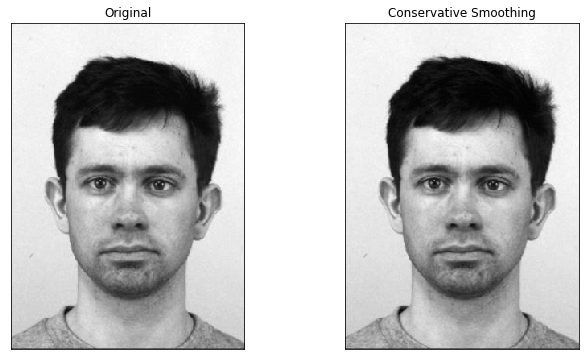

In [84]:
new_image = conservative_smoothing_gray(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

# Laplacian Filter

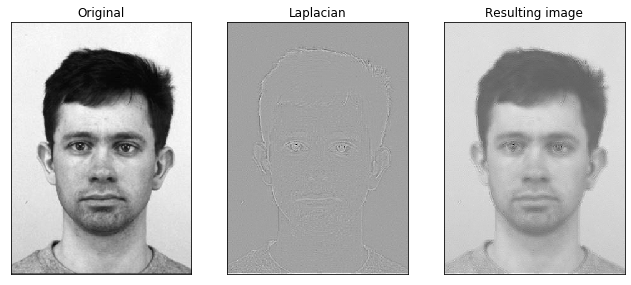

In [85]:
new_image = cv2.Laplacian(image2,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image2 + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()

# Frequency Filter

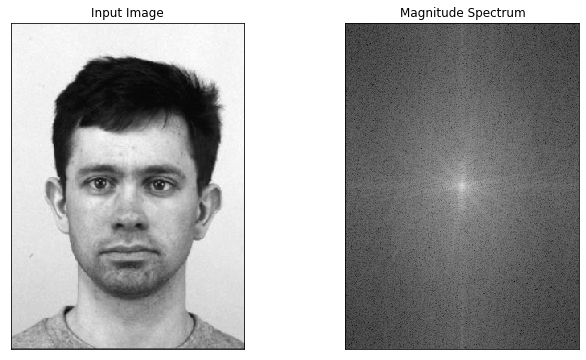

In [86]:
dft = cv2.dft(np.float32(image2),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

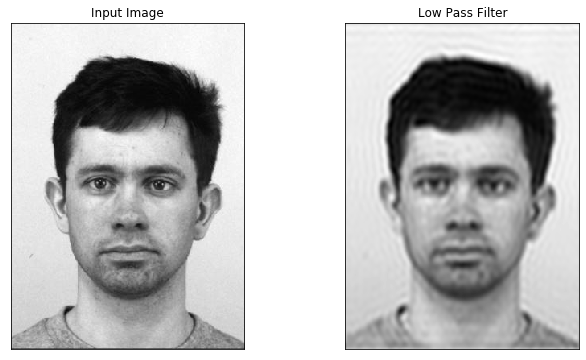

In [87]:
rows, cols = image2.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Crimmins Speckle Removal

# Unsharp Filter

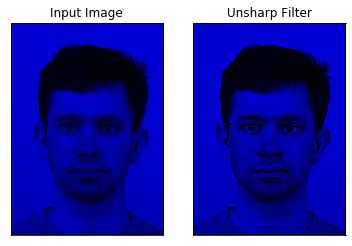

In [88]:
image = Image.fromarray(image.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Image Registration using OpenCV | Python

In [89]:
# https://www.geeksforgeeks.org/image-registration-using-opencv-python/
import cv2 
import numpy as np 

# Open the image files. 
img1_color = cv2.imread("align.jpg") # Image to be aligned. 
img2_color = cv2.imread("ref.jpg") # Reference image. 

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
# (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 

# Match features between the two images. 
# We create a Brute Force matcher with 
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 

# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 

# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 

# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 

for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 

# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
					homography, (width, height)) 

# Save the output. 
# cv2.imwrite('output.jpg', transformed_img)

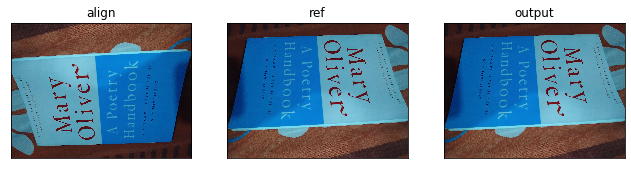

In [90]:
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(img1_color),plt.title('align')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2_color),plt.title('ref')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(transformed_img),plt.title('output')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Segmentation with Watershed Algorithm

In [91]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

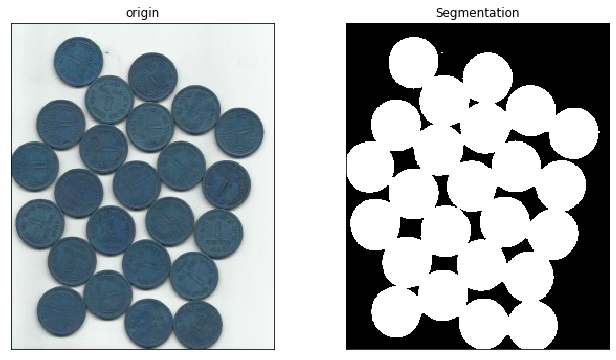

In [92]:
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('Segmentation'), plt.xticks([]), plt.yticks([])
plt.show()

# Canny Edge Detection

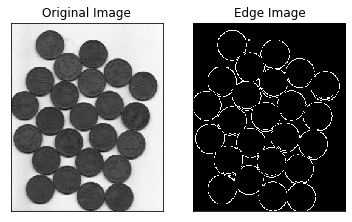

In [93]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('coins.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# # Color Detection

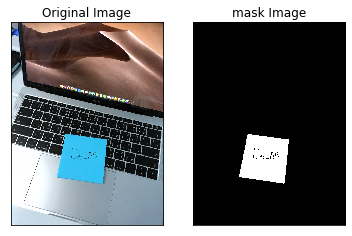

In [94]:
import numpy as np
import cv2
path_img = 'note.jpg'
img = cv2.imread(path_img)
img_origin = img
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([20,180,180])
upper_blue = np.array([40,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.subplot(121),plt.imshow(img_origin)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mask,cmap = 'gray')
plt.title('mask Image'), plt.xticks([]), plt.yticks([])

plt.show()

approx [[[1083 2222]]

 [[ 911 3075]]

 [[1807 3207]]

 [[1892 2335]]]


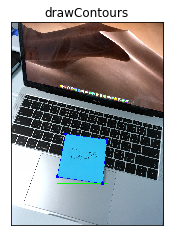

In [95]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
   rect = cv2.boundingRect(c)
   x,y,w,h = rect
   area = w * h

   epsilon = 0.08 * cv2.arcLength(c, True)
   approx = cv2.approxPolyDP(c, epsilon, True)

   if area > 200000:
      cv2.drawContours(img, [approx], -1, (0, 0, 255), 5)
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
      print('approx', approx)
      for x in range(0, len(approx)):
         cv2.circle(img, (approx[x][0][0], approx[x][0][1]), 30, (0,0,255), -1)
        
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('drawContours'), plt.xticks([]), plt.yticks([])
plt.show()